In [1]:
import numpy as np
# visualização de gráficos
import seaborn as sns
# visualização de gráficos
import matplotlib.pyplot as plt
# visualizar grafico dinâmico 
import plotly.express as px
# GaussianNB - Nome de uma distirbuição estatistica (usado para problemas genericos
from sklearn.naive_bayes import GaussianNB
import pickle
# importação de arquivo
import pandas as pd
from sklearn.svm import SVC

In [2]:
with open('./../base/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [3]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [4]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [5]:
# melhor kernel
svm_census = SVC(kernel='linear', random_state=1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [8]:
predict = svm_census.predict(X_census_teste)
predict

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [10]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, predict)

0.8509723643807574

0.8509723643807574

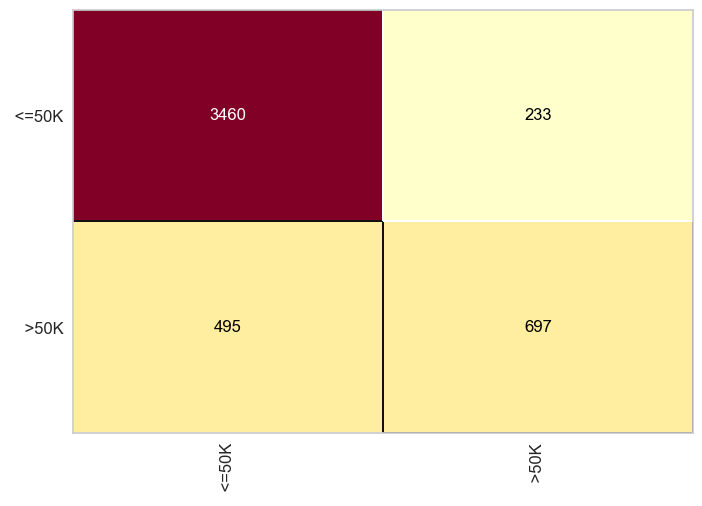

In [11]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [13]:
print(classification_report(y_census_teste, predict))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

